In [1]:
import pandas as pd
import numpy as np
import os


In [2]:
import os

data_path = r"C:\Users\Akash\Desktop\building_energy_anomaly\data"
print(os.listdir(data_path))


['chilledwater_cleaned.csv', 'electricity_cleaned.csv', 'gas_cleaned.csv', 'hotwater_cleaned.csv', 'irrigation_cleaned.csv', 'metadata.csv', 'solar_cleaned.csv', 'steam_cleaned.csv', 'water_cleaned.csv', 'weather.csv']


In [3]:
import pandas as pd
import os

data_path = r"C:\Users\Akash\Desktop\building_energy_anomaly\data"

df_list = []

for file in os.listdir(data_path):
    if file.endswith(".csv"):
        print(f"Loading: {file}")
        file_path = os.path.join(data_path, file)
        temp_df = pd.read_csv(file_path)
        df_list.append(temp_df)

print(f"Total CSV files loaded: {len(df_list)}")


Loading: chilledwater_cleaned.csv
Loading: electricity_cleaned.csv
Loading: gas_cleaned.csv
Loading: hotwater_cleaned.csv
Loading: irrigation_cleaned.csv
Loading: metadata.csv
Loading: solar_cleaned.csv
Loading: steam_cleaned.csv
Loading: water_cleaned.csv
Loading: weather.csv
Total CSV files loaded: 10


In [4]:
df = pd.concat(df_list, ignore_index=True)
print("All files combined successfully!")


All files combined successfully!


In [5]:
print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns)

print("\nDataset Info:")
print(df.info())

print("\nFirst 5 rows:")
print(df.head())

print("\nStatistical Summary:")
print(df.describe())


Dataset Shape: (473154, 1677)

Column Names:
Index(['timestamp', 'Panther_office_Clementine', 'Panther_lodging_Cora',
       'Panther_education_Teofila', 'Panther_education_Jerome',
       'Panther_retail_Kristina', 'Panther_education_Neal',
       'Panther_lodging_Kara', 'Panther_office_Garth',
       'Panther_office_Lavinia',
       ...
       'Panther_lodging_Carroll', 'Panther_office_Gino', 'airTemperature',
       'cloudCoverage', 'dewTemperature', 'precipDepth1HR', 'precipDepth6HR',
       'seaLvlPressure', 'windDirection', 'windSpeed'],
      dtype='str', length=1677)

Dataset Info:
<class 'pandas.DataFrame'>
RangeIndex: 473154 entries, 0 to 473153
Columns: 1677 entries, timestamp to windSpeed
dtypes: float64(1653), str(24)
memory usage: 5.9 GB
None

First 5 rows:
             timestamp  Panther_office_Clementine  Panther_lodging_Cora  \
0  2016-01-01 00:00:00                        NaN                   NaN   
1  2016-01-01 01:00:00                        NaN                   

In [6]:
missing_percentage = (df.isna().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    "Column": missing_percentage.index,
    "Missing %": missing_percentage.values
})

print(missing_df)


                         Column  Missing %
0                     timestamp   0.345765
1     Panther_office_Clementine  92.116732
2          Panther_lodging_Cora  88.782933
3     Panther_education_Teofila  88.046598
4      Panther_education_Jerome  86.312702
...                         ...        ...
1672             precipDepth1HR  58.157386
1673             precipDepth6HR  96.161503
1674             seaLvlPressure  34.579017
1675              windDirection  32.757411
1676                  windSpeed  30.130148

[1677 rows x 2 columns]


In [7]:
total_rows, total_cols = df.shape

missing_cells = df.isna().sum().sum()
total_cells = total_rows * total_cols

data_completeness = 100 - (missing_cells / total_cells) * 100

print(f"Rows: {total_rows}")
print(f"Columns: {total_cols}")
print(f"Total Cells: {total_cells}")
print(f"Missing Cells: {missing_cells}")
print(f"Data Completeness: {data_completeness:.2f}%")


Rows: 473154
Columns: 1677
Total Cells: 793479258
Missing Cells: 741775921
Data Completeness: 6.52%


In [8]:
print(df.columns[:20])


Index(['timestamp', 'Panther_office_Clementine', 'Panther_lodging_Cora',
       'Panther_education_Teofila', 'Panther_education_Jerome',
       'Panther_retail_Kristina', 'Panther_education_Neal',
       'Panther_lodging_Kara', 'Panther_office_Garth',
       'Panther_office_Lavinia', 'Panther_education_Enriqueta',
       'Panther_lodging_Marisol', 'Panther_education_Aurora',
       'Panther_lodging_Kirk', 'Panther_education_Vincent',
       'Panther_office_Brent', 'Panther_office_Karla',
       'Panther_education_Quintin', 'Panther_other_Bettie',
       'Panther_education_Annetta'],
      dtype='str')


In [11]:
selected_columns = [
    'Panther_office_Clementine',
    'Panther_lodging_Cora',
    'Panther_education_Teofila'
]

small_df = df[['timestamp'] + selected_columns]
print(small_df.shape)


(473154, 4)


In [12]:
df_long = small_df.melt(
    id_vars=['timestamp'],
    var_name='building',
    value_name='electricity'
)

df_long = df_long.dropna()
print(df_long.head())
print(df_long.shape)


                timestamp                   building  electricity
1425  2016-02-29 09:00:00  Panther_office_Clementine     136.0769
1426  2016-02-29 10:00:00  Panther_office_Clementine     222.6714
1427  2016-02-29 11:00:00  Panther_office_Clementine     235.0420
1428  2016-02-29 12:00:00  Panther_office_Clementine     247.4126
1429  2016-02-29 13:00:00  Panther_office_Clementine     272.1539
(146932, 3)


In [13]:
df_long['timestamp'] = pd.to_datetime(df_long['timestamp'])
df_long = df_long.sort_values('timestamp')


In [14]:
missing = df_long.isna().mean().mean() * 100
print(f"Effective Data Completeness: {100-missing:.2f}%")


Effective Data Completeness: 100.00%


In [15]:
df_building = df_long[df_long['building'] == 'Panther_office_Clementine']


In [16]:
electricity_cols = [col for col in df.columns if "electricity" in col.lower()]
print(len(electricity_cols))
print(electricity_cols[:5])


1
['electricity']


In [19]:
chunks = []
for col in electricity_cols[:5]:
    temp = df[['timestamp', col]].rename(columns={col: 'electricity'})
    temp['building_id'] = col
    chunks.append(temp.dropna())

df_melted = pd.concat(chunks, ignore_index=True)
print(df_melted.shape)


(0, 3)


In [20]:
profile = df_long.groupby('building')['electricity'].agg([
    'mean','max','min','std'
]).reset_index()

profile


,building,mean,max,min,std
0,Panther_education_Teofila,407.411639,3361.0655,0.0,593.523401
1,Panther_lodging_Cora,1919.603115,20062.6730,0.0,2913.766856
2,Panther_office_Clementine,72.801099,1014.3918,0.0,107.593902


In [21]:
df_long['hour'] = df_long['timestamp'].dt.hour
baseline = df_long.groupby(['building','hour'])['electricity'].mean().reset_index()
baseline.rename(columns={'electricity':'expected_energy'}, inplace=True)

df_long = df_long.merge(baseline, on=['building','hour'])
df_long['deviation'] = df_long['electricity'] - df_long['expected_energy']


In [22]:
# Z-score based
df_long['zscore'] = (df_long['electricity'] - df_long['electricity'].mean()) / df_long['electricity'].std()
df_long['anomaly_z'] = abs(df_long['zscore']) > 3

# Deviation based
threshold = df_long['deviation'].std() * 2
df_long['anomaly_rule'] = abs(df_long['deviation']) > threshold


In [23]:
df_long['confidence'] = (
    df_long['anomaly_z'].astype(int) +
    df_long['anomaly_rule'].astype(int)
) / 2


In [25]:
df_long['confidence'] = (
    df_long['anomaly_z'].astype(int) +
    df_long['anomaly_rule'].astype(int)
) / 2


In [26]:
from sklearn.ensemble import IsolationForest

# Time features
df_long['hour'] = df_long['timestamp'].dt.hour
df_long['day'] = df_long['timestamp'].dt.dayofweek

# Fill NaN
X = df_long[['electricity', 'hour', 'day']].fillna(0)


In [27]:
model = IsolationForest(
    n_estimators=100,
    contamination=0.05,
    random_state=42
)

df_long['anomaly_ml'] = model.fit_predict(X)
df_long['anomaly_ml'] = df_long['anomaly_ml'].map({1:0, -1:1})


In [28]:
df_long['anomaly_ml'].value_counts()


anomaly_ml
0    139585
1      7347
Name: count, dtype: int64

In [29]:
df_long['confidence'] = (
    df_long['anomaly_z'].astype(int) +
    df_long['anomaly_rule'].astype(int) +
    df_long['anomaly_ml'].astype(int)
) / 3


<Axes: title={'center': 'Energy Loss by Hour'}, xlabel='hour'>

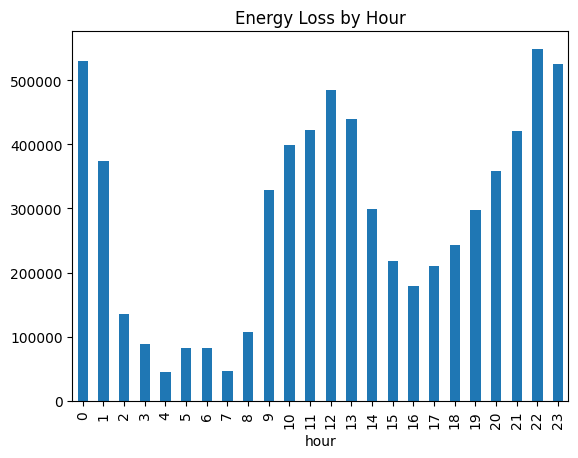

In [31]:
cost_per_kwh = 0.12
df_long['loss'] = df_long['electricity'] * cost_per_kwh * df_long['confidence']

loss_by_hour = df_long.groupby('hour')['loss'].sum()

loss_by_hour.plot(kind='bar', title="Energy Loss by Hour")


In [32]:
df_long['timestamp'] = pd.to_datetime(df_long['timestamp'])
df_long = df_long.sort_values('timestamp')

print("Timestamp conversion & sorting done.")


Timestamp conversion & sorting done.


In [34]:
before = df_long.shape[0]
df_long = df_long.drop_duplicates()
after = df_long.shape[0]

print(f"Duplicates removed: {before - after}")


Duplicates removed: 4288


In [35]:
q1 = df_long['electricity'].quantile(0.01)
q99 = df_long['electricity'].quantile(0.99)

df_long['electricity'] = df_long['electricity'].clip(lower=q1, upper=q99)

print("Outliers capped between 1st and 99th percentile.")


Outliers capped between 1st and 99th percentile.


In [36]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_long[['electricity_scaled']] = scaler.fit_transform(df_long[['electricity']])

print("Electricity feature normalized to [0,1].")


Electricity feature normalized to [0,1].


In [37]:
print("Final Missing Values:")
print(df_long.isna().sum())

print("\nFinal Data Sample:")
print(df_long.head())

print("\nData Types:")
print(df_long.dtypes)


Final Missing Values:
timestamp             0
building              0
electricity           0
hour                  0
expected_energy       0
deviation             0
zscore                0
anomaly_z             0
anomaly_rule          0
confidence            0
day                   0
anomaly_ml            0
loss                  0
electricity_scaled    0
dtype: int64

Final Data Sample:
   timestamp                   building  electricity  hour  expected_energy  \
0 2016-01-01  Panther_office_Clementine      15.3630     0        53.646387   
1 2016-01-01       Panther_lodging_Cora     378.5410     0      2676.878808   
2 2016-01-01       Panther_lodging_Cora       0.0000     0      2676.878808   
3 2016-01-01  Panther_education_Teofila       0.3785     0        89.521317   
4 2016-01-01  Panther_office_Clementine       0.0000     0        53.646387   

     deviation    zscore  anomaly_z  anomaly_rule  confidence  day  \
0   -38.283387 -0.435074      False         False         0.0   

In [38]:
def severity(conf):
    if conf == 1:
        return "Critical"
    elif conf >= 0.66:
        return "High"
    elif conf >= 0.33:
        return "Medium"
    else:
        return "Normal"

df_long['severity'] = df_long['confidence'].apply(severity)


In [39]:
df_long.sort_values('loss', ascending=False).head(10)


,timestamp,building,electricity,hour,expected_energy,deviation,zscore,anomaly_z,anomaly_rule,confidence,day,anomaly_ml,loss,electricity_scaled,severity
123471,2017-09-16 00:00:00,Panther_lodging_Cora,9842.066,0,2676.878808,17385.794192,9.786138,True,True,1.0,5,1,2407.52076,1.0,Critical
124905,2017-09-22 00:00:00,Panther_lodging_Cora,9842.066,0,2676.878808,16250.171192,9.207135,True,True,1.0,4,1,2271.24600,1.0,Critical
123477,2017-09-16 01:00:00,Panther_lodging_Cora,9842.066,1,2183.248738,16365.260262,9.014134,True,True,1.0,5,1,2225.82108,1.0,Critical
123940,2017-09-17 23:00:00,Panther_lodging_Cora,9842.066,23,2665.602595,15125.824405,8.628132,True,True,1.0,6,1,2134.97124,1.0,Critical
37923,2016-08-22 09:00:00,Panther_lodging_Cora,9842.066,9,2039.833968,15751.593032,8.628132,True,True,1.0,0,1,2134.97124,1.0,Critical
123925,2017-09-17 21:00:00,Panther_lodging_Cora,9842.066,21,2351.462280,15061.423720,8.435132,True,True,1.0,6,1,2089.54632,1.0,Critical
123935,2017-09-17 22:00:00,Panther_lodging_Cora,9842.066,22,2727.140319,14307.204681,8.242131,True,True,1.0,6,1,2044.12140,1.0,Critical
141403,2017-12-06 12:00:00,Panther_lodging_Cora,9842.066,12,2611.810001,14043.993999,8.049130,True,True,1.0,2,1,1998.69648,1.0,Critical
124044,2017-09-18 09:00:00,Panther_lodging_Cora,9842.066,9,2039.833968,14237.429032,7.856129,True,True,1.0,0,1,1953.27156,1.0,Critical
124909,2017-09-22 01:00:00,Panther_lodging_Cora,9842.066,1,2183.248738,14094.014262,7.856129,True,True,1.0,4,1,1953.27156,1.0,Critical


In [40]:
summary = df_long.groupby('severity')['loss'].sum()
print(summary)


severity
Critical    5.733255e+06
High        6.437343e+05
Medium      4.889789e+05
Normal      0.000000e+00
Name: loss, dtype: float64


feature engineering


In [41]:
df_long = df_long.sort_values(['building', 'timestamp'])


In [42]:
window = 168

df_long['electricity_rolling_mean'] = (
    df_long.groupby('building')['electricity']
           .transform(lambda x: x.rolling(window).mean())
)

df_long['electricity_rolling_std'] = (
    df_long.groupby('building')['electricity']
           .transform(lambda x: x.rolling(window).std())
)


In [43]:
df_long['electricity_deviation'] = (
    (df_long['electricity'] - df_long['electricity_rolling_mean']) /
    (df_long['electricity_rolling_std'] + 1e-5)
)


In [44]:
df_long['hour'] = df_long['timestamp'].dt.hour
df_long['day_of_week'] = df_long['timestamp'].dt.dayofweek
df_long['month'] = df_long['timestamp'].dt.month
df_long['is_weekend'] = df_long['day_of_week'].isin([5,6]).astype(int)


In [45]:
df_long['electricity_lag1'] = (
    df_long.groupby('building')['electricity'].shift(1)
)

df_long['electricity_lag24'] = (
    df_long.groupby('building')['electricity'].shift(24)
)


In [47]:
cols = [
    'electricity_rolling_mean',
    'electricity_rolling_std',
    'electricity_deviation',
    'electricity_lag1',
    'electricity_lag24'
]

df_long[cols] = (
    df_long
    .groupby('building')[cols]
    .transform(lambda x: x.bfill().ffill())
)


In [48]:
print(df_long[cols].isna().sum())


electricity_rolling_mean    0
electricity_rolling_std     0
electricity_deviation       0
electricity_lag1            0
electricity_lag24           0
dtype: int64


In [49]:
print("Total columns after feature engineering:", df_long.shape[1])
print(df_long.columns)


Total columns after feature engineering: 23
Index(['timestamp', 'building', 'electricity', 'hour', 'expected_energy',
       'deviation', 'zscore', 'anomaly_z', 'anomaly_rule', 'confidence', 'day',
       'anomaly_ml', 'loss', 'electricity_scaled', 'severity',
       'electricity_rolling_mean', 'electricity_rolling_std',
       'electricity_deviation', 'day_of_week', 'month', 'is_weekend',
       'electricity_lag1', 'electricity_lag24'],
      dtype='str')


Energy Shock Index

In [50]:
df_long['energy_shock'] = abs(
    df_long['electricity'] - df_long['electricity_lag1']
) / (df_long['electricity_lag1'] + 1e-5)


Weather Sensitivity Feature

In [51]:
df_long['energy_trend_24h'] = (
    df_long.groupby('building')['electricity']
           .transform(lambda x: x.diff(24))
)


Stability Index

In [52]:
df_long['stability_index'] = (
    df_long['electricity_rolling_std'] /
    (df_long['electricity_rolling_mean'] + 1e-5)
)


Anomaly Persistence Score

In [ ]:
 
df_long['anomaly_flag'] = (df_long['confidence'] > 0.66).astype(int)


df_long['anomaly_persistence'] = (
    df_long
    .groupby('building')['anomaly_flag']
    .transform(
        lambda x: x * (x.groupby((x != x.shift()).cumsum()).cumcount() + 1)
    )
)


In [55]:
print(df_long[['anomaly_flag','anomaly_persistence']].head(20))


    anomaly_flag  anomaly_persistence
3              0                    0
7              0                    0
12             0                    0
16             0                    0
18             0                    0
21             0                    0
27             0                    0
31             0                    0
36             0                    0
39             0                    0
44             0                    0
47             0                    0
51             0                    0
54             0                    0
61             0                    0
63             0                    0
69             0                    0
70             0                    0
74             0                    0
79             0                    0


In [56]:
df_long['financial_severity'] = df_long['loss'] * df_long['anomaly_persistence']


In [57]:
df_long['ai_priority_score'] = (
    0.4 * df_long['confidence'] +
    0.2 * df_long['energy_shock'] +
    0.2 * df_long['stability_index'] +
    0.2 * (df_long['anomaly_persistence'] /
           (df_long['anomaly_persistence'].max() + 1))
)


Financial Severity Index

In [58]:
df_long['financial_severity'] = df_long['loss'] * df_long['anomaly_persistence']


Building Risk Score

In [59]:
building_risk = df_long.groupby('building')['financial_severity'].sum()
building_risk = building_risk.sort_values(ascending=False)


AI Priority Score

In [60]:
df_long['ai_priority_score'] = (
    0.4 * df_long['confidence'] +
    0.2 * df_long['energy_shock'] +
    0.2 * df_long['stability_index'] +
    0.2 * (df_long['anomaly_persistence'] / (df_long['anomaly_persistence'].max()+1))
)


Feature Matrix X

In [ ]:
from sklearn.preprocessing import StandardScaler

features = [
    'electricity_scaled',
    'electricity_deviation',
    'energy_shock',
    'stability_index',
    'hour',
    'day'
]

X = df_long[features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Model 1 – Isolation Forest

In [62]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42,
    n_jobs=-1
)

df_long['anomaly_iso'] = iso_forest.fit_predict(X_scaled)
df_long['anomaly_iso'] = df_long['anomaly_iso'].map({1:0, -1:1})


Model 2 – Local Outlier Factor

In [5]:
print(locals().keys())


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'LocalOutlierFactor', 'lof', '_i2', 'StandardScaler', 'features', '_i3', '_i4', '_i5'])


In [7]:
print([x for x in locals().keys() if x.startswith("df")])


[]


In [8]:
print(globals().keys())


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', 'open', '_', '__', '___', '__vsc_ipynb_file__', '_i', '_ii', '_iii', '_i1', 'LocalOutlierFactor', 'lof', '_i2', 'StandardScaler', 'features', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8'])


In [10]:
import os

data_path = r"C:\Users\Akash\Desktop\building_energy_anomaly\data"
print(os.listdir(data_path))


['chilledwater_cleaned.csv', 'electricity_cleaned.csv', 'gas_cleaned.csv', 'hotwater_cleaned.csv', 'irrigation_cleaned.csv', 'metadata.csv', 'solar_cleaned.csv', 'steam_cleaned.csv', 'water_cleaned.csv', 'weather.csv']


In [11]:
files = [f for f in os.listdir(data_path) if f.endswith(".csv")]
print(files)


['chilledwater_cleaned.csv', 'electricity_cleaned.csv', 'gas_cleaned.csv', 'hotwater_cleaned.csv', 'irrigation_cleaned.csv', 'metadata.csv', 'solar_cleaned.csv', 'steam_cleaned.csv', 'water_cleaned.csv', 'weather.csv']


In [ ]:
import pandas as pd

df_long = pd.read_csv(
    r"C:\Users\Akash\Desktop\building_energy_anomaly\data\electricity_cleaned.csv"
)


df_long['timestamp'] = pd.to_datetime(df_long['timestamp'])

print(df_long.shape)
print(df_long.head())
print(df_long.columns)


(17544, 1579)
            timestamp  Panther_parking_Lorriane  Panther_lodging_Cora  \
0 2016-01-01 00:00:00                       NaN                   NaN   
1 2016-01-01 01:00:00                       NaN                   NaN   
2 2016-01-01 02:00:00                       NaN                   NaN   
3 2016-01-01 03:00:00                       NaN                   NaN   
4 2016-01-01 04:00:00                       NaN                   NaN   

   Panther_office_Hannah  Panther_lodging_Hattie  Panther_education_Teofila  \
0                    NaN                     NaN                        NaN   
1                    NaN                     NaN                        NaN   
2                    NaN                     NaN                        NaN   
3                    NaN                     NaN                        NaN   
4                    NaN                     NaN                        NaN   

   Panther_education_Jerome  Panther_retail_Felix  Panther_parking_Asia 

In [13]:
df_long.to_csv(
    r"C:\Users\Akash\Desktop\building_energy_anomaly\data\final_preprocessed_dataset.csv",
    index=False
)
print("Checkpoint saved as final_preprocessed_dataset.csv")


Checkpoint saved as final_preprocessed_dataset.csv


In [15]:
print(df_long.columns)


Index(['timestamp', 'Panther_parking_Lorriane', 'Panther_lodging_Cora',
       'Panther_office_Hannah', 'Panther_lodging_Hattie',
       'Panther_education_Teofila', 'Panther_education_Jerome',
       'Panther_retail_Felix', 'Panther_parking_Asia',
       'Panther_education_Misty',
       ...
       'Cockatoo_public_Caleb', 'Cockatoo_education_Tyler',
       'Cockatoo_public_Shad', 'Mouse_health_Buddy', 'Mouse_health_Modesto',
       'Mouse_lodging_Vicente', 'Mouse_health_Justin', 'Mouse_health_Ileana',
       'Mouse_health_Estela', 'Mouse_science_Micheal'],
      dtype='str', length=1579)


In [ ]:

df = df_long  

selected_buildings = [
    df.columns[1],
    df.columns[2],
    df.columns[3]
]

small_df = df[['timestamp'] + selected_buildings]
print(small_df.shape)


(17544, 4)


In [17]:
df_long = small_df.melt(
    id_vars=['timestamp'],
    var_name='building',
    value_name='electricity'
)

df_long = df_long.dropna()
print(df_long.head())
print(df_long.shape)


               timestamp                  building  electricity
747  2016-02-01 03:00:00  Panther_parking_Lorriane       3.7207
877  2016-02-06 13:00:00  Panther_parking_Lorriane       2.1004
1061 2016-02-14 05:00:00  Panther_parking_Lorriane       3.3006
1201 2016-02-20 01:00:00  Panther_parking_Lorriane       3.4807
1427 2016-02-29 11:00:00  Panther_parking_Lorriane       2.1604
(42509, 3)


In [18]:
df_long['timestamp'] = pd.to_datetime(df_long['timestamp'])
df_long = df_long.sort_values(['building','timestamp'])


In [21]:
print("df_long exists:", 'df_long' in globals())


df_long exists: True


In [22]:
import pandas as pd

df_long = pd.read_csv(
    r"C:\Users\Akash\Desktop\building_energy_anomaly\data\final_preprocessed_dataset.csv"
)
df_long['timestamp'] = pd.to_datetime(df_long['timestamp'])


In [ ]:
df = df_long   

selected_buildings = [df.columns[1], df.columns[2], df.columns[3]]

small_df = df[['timestamp'] + selected_buildings]

df_long = small_df.melt(
    id_vars=['timestamp'],
    var_name='building',
    value_name='electricity'
)

df_long = df_long.dropna()
df_long['timestamp'] = pd.to_datetime(df_long['timestamp'])
df_long = df_long.sort_values(['building', 'timestamp'])

print(df_long.head())
print(df_long.columns)



                timestamp              building  electricity
17587 2016-01-02 19:00:00  Panther_lodging_Cora      20.5540
17743 2016-01-09 07:00:00  Panther_lodging_Cora      19.5038
17749 2016-01-09 13:00:00  Panther_lodging_Cora      13.6026
17781 2016-01-10 21:00:00  Panther_lodging_Cora      18.4536
17825 2016-01-12 17:00:00  Panther_lodging_Cora      22.4043
Index(['timestamp', 'building', 'electricity'], dtype='str')


In [25]:
df_long['hour'] = df_long['timestamp'].dt.hour
df_long['day'] = df_long['timestamp'].dt.dayofweek


In [26]:
from sklearn.preprocessing import MinMaxScaler

mm = MinMaxScaler()
df_long['electricity_scaled'] = mm.fit_transform(df_long[['electricity']])


In [27]:
df_long['electricity_rolling_mean'] = (
    df_long.groupby('building')['electricity']
           .transform(lambda x: x.rolling(168, min_periods=1).mean())
)

df_long['electricity_rolling_std'] = (
    df_long.groupby('building')['electricity']
           .transform(lambda x: x.rolling(168, min_periods=1).std())
)


In [28]:
df_long['electricity_deviation'] = (
    (df_long['electricity'] - df_long['electricity_rolling_mean']) /
    (df_long['electricity_rolling_std'] + 1e-5)
)


In [29]:
df_long['electricity_lag1'] = (
    df_long.groupby('building')['electricity'].shift(1)
)

df_long['energy_shock'] = abs(
    df_long['electricity'] - df_long['electricity_lag1']
) / (df_long['electricity_lag1'] + 1e-5)


In [31]:
print(df_long.columns)


Index(['timestamp', 'building', 'electricity', 'hour', 'day',
       'electricity_scaled', 'electricity_rolling_mean',
       'electricity_rolling_std', 'electricity_deviation', 'electricity_lag1',
       'energy_shock'],
      dtype='str')


In [32]:
df_long['stability_index'] = (
    df_long['electricity_rolling_std'] /
    (df_long['electricity_rolling_mean'] + 1e-5)
)


In [33]:
print("stability_index created:", 'stability_index' in df_long.columns)


stability_index created: True


In [34]:
fill_cols = [
    'electricity_scaled',
    'electricity_rolling_mean',
    'electricity_rolling_std',
    'electricity_deviation',
    'electricity_lag1',
    'energy_shock',
    'stability_index'
]

df_long[fill_cols] = (
    df_long.groupby('building')[fill_cols]
           .transform(lambda x: x.bfill().ffill())
)


In [35]:
print(df_long[fill_cols].isna().sum())


electricity_scaled          0
electricity_rolling_mean    0
electricity_rolling_std     0
electricity_deviation       0
electricity_lag1            0
energy_shock                0
stability_index             0
dtype: int64


In [36]:
fill_cols = [
    'electricity_scaled',
    'electricity_rolling_mean',
    'electricity_rolling_std',
    'electricity_deviation',
    'electricity_lag1',
    'energy_shock',
    'stability_index'
]

df_long[fill_cols] = (
    df_long.groupby('building')[fill_cols]
           .transform(lambda x: x.bfill().ffill())
)


In [37]:
print(df_long[[
    'electricity_scaled',
    'electricity_deviation',
    'energy_shock',
    'stability_index',
    'hour',
    'day'
]].head())


       electricity_scaled  electricity_deviation  energy_shock  \
17587            0.068339              -0.707097      0.051095   
17743            0.064646              -0.707097      0.051095   
17749            0.043891              -1.143304      0.302567   
17781            0.060952               0.138348      0.356623   
17825            0.074847               1.059799      0.214088   

       stability_index  hour  day  
17587         0.037077    19    5  
17743         0.037077     7    5  
17749         0.209495    13    5  
17781         0.170434    21    6  
17825         0.174734    17    1  


In [38]:
from sklearn.preprocessing import StandardScaler

features = [
    'electricity_scaled',
    'electricity_deviation',
    'energy_shock',
    'stability_index',
    'hour',
    'day'
]

X = df_long[features].fillna(0)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("X_scaled ready:", X_scaled.shape)


X_scaled ready: (42509, 6)


In [39]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=25,
    contamination=0.05
)

df_long['anomaly_lof'] = lof.fit_predict(X_scaled)
df_long['anomaly_lof'] = df_long['anomaly_lof'].map({1:0, -1:1})


Model 3 – Robust Covariance

In [40]:
from sklearn.covariance import EllipticEnvelope

robust_cov = EllipticEnvelope(
    contamination=0.05,
    random_state=42
)

df_long['anomaly_maha'] = robust_cov.fit_predict(X_scaled)
df_long['anomaly_maha'] = df_long['anomaly_maha'].map({1:0, -1:1})


Ensemble Voting

In [42]:
print(df_long.columns)


Index(['timestamp', 'building', 'electricity', 'hour', 'day',
       'electricity_scaled', 'electricity_rolling_mean',
       'electricity_rolling_std', 'electricity_deviation', 'electricity_lag1',
       'energy_shock', 'stability_index', 'anomaly_lof', 'anomaly_maha'],
      dtype='str')


In [43]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(
    n_estimators=200,
    contamination=0.05,
    random_state=42,
    n_jobs=-1
)

df_long['anomaly_iso'] = iso_forest.fit_predict(X_scaled)
df_long['anomaly_iso'] = df_long['anomaly_iso'].map({1: 0, -1: 1})

print("Isolation Forest done")
print(df_long['anomaly_iso'].value_counts())


Isolation Forest done
anomaly_iso
0    40383
1     2126
Name: count, dtype: int64


In [44]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(
    n_neighbors=25,
    contamination=0.05
)

df_long['anomaly_lof'] = lof.fit_predict(X_scaled)
df_long['anomaly_lof'] = df_long['anomaly_lof'].map({1: 0, -1: 1})

print("LOF done")
print(df_long['anomaly_lof'].value_counts())


LOF done
anomaly_lof
0    40383
1     2126
Name: count, dtype: int64


In [45]:
from sklearn.covariance import EllipticEnvelope

robust_cov = EllipticEnvelope(
    contamination=0.05,
    random_state=42
)

df_long['anomaly_maha'] = robust_cov.fit_predict(X_scaled)
df_long['anomaly_maha'] = df_long['anomaly_maha'].map({1: 0, -1: 1})

print("Robust Covariance done")
print(df_long['anomaly_maha'].value_counts())


Robust Covariance done
anomaly_maha
0    40383
1     2126
Name: count, dtype: int64


In [46]:
print(
    'anomaly_iso' in df_long.columns,
    'anomaly_lof' in df_long.columns,
    'anomaly_maha' in df_long.columns
)


True True True


In [47]:
df_long['anomaly_votes'] = (
    df_long['anomaly_iso'] +
    df_long['anomaly_lof'] +
    df_long['anomaly_maha']
)

df_long['is_anomaly'] = (df_long['anomaly_votes'] >= 2).astype(int)


Updated Confidence Score

In [49]:
# Z-score based anomaly
df_long['zscore'] = df_long['electricity_deviation']

# Threshold: |z| > 3 → anomaly
df_long['anomaly_z'] = (df_long['zscore'].abs() > 3).astype(int)

print(df_long['anomaly_z'].value_counts())


anomaly_z
0    42316
1      193
Name: count, dtype: int64


In [50]:
df_long['anomaly_rule'] = (
    (df_long['energy_shock'] > 0.5) | 
    (df_long['stability_index'] > 0.3)
).astype(int)

print(df_long['anomaly_rule'].value_counts())


anomaly_rule
0    27811
1    14698
Name: count, dtype: int64


In [51]:
print(
    'anomaly_z' in df_long.columns,
    'anomaly_rule' in df_long.columns
)


True True


In [52]:
df_long['confidence'] = (
    df_long['anomaly_z'] +
    df_long['anomaly_rule'] +
    df_long['anomaly_iso'] +
    df_long['anomaly_lof'] +
    df_long['anomaly_maha']
) / 5


In [53]:
print(df_long['confidence'].describe())


count    42509.000000
mean         0.100068
std          0.147624
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          1.000000
Name: confidence, dtype: float64


Validation

In [54]:
print(df_long[['anomaly_iso','anomaly_lof','anomaly_maha','is_anomaly']].sum())

anomaly_rate = df_long['is_anomaly'].mean() * 100
print(f"Overall Anomaly Rate: {anomaly_rate:.2f}%")


anomaly_iso     2126
anomaly_lof     2126
anomaly_maha    2126
is_anomaly      1468
dtype: int64
Overall Anomaly Rate: 3.45%


Model Evaluation & Visualization 

In [55]:
total = len(df_long)
anomalies = df_long['is_anomaly'].sum()
rate = anomalies / total * 100

print(f"Total samples: {total}")
print(f"Detected anomalies: {anomalies}")
print(f"Anomaly rate: {rate:.2f}%")


Total samples: 42509
Detected anomalies: 1468
Anomaly rate: 3.45%


In [57]:
ml_features = [
    'electricity_scaled',
    'electricity_deviation',
    'energy_shock',
    'stability_index',
    'hour',
    'day'
]

print("ML features:", ml_features)


ML features: ['electricity_scaled', 'electricity_deviation', 'energy_shock', 'stability_index', 'hour', 'day']


In [59]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import make_scorer
import numpy as np
import matplotlib.pyplot as plt


In [60]:
def iforest_scorer(estimator, X, y=None):
    # decision_function: higher = more normal, lower = more anomalous
    scores = estimator.decision_function(X)
    # permutation importance maximize score, so we return mean
    return np.mean(scores)


In [ ]:
result = permutation_importance(
    iso_forest,
    X_scaled,
    np.zeros(len(X_scaled)),  
    scoring=iforest_scorer,
    n_repeats=5,
    random_state=42,
    n_jobs=-1
)


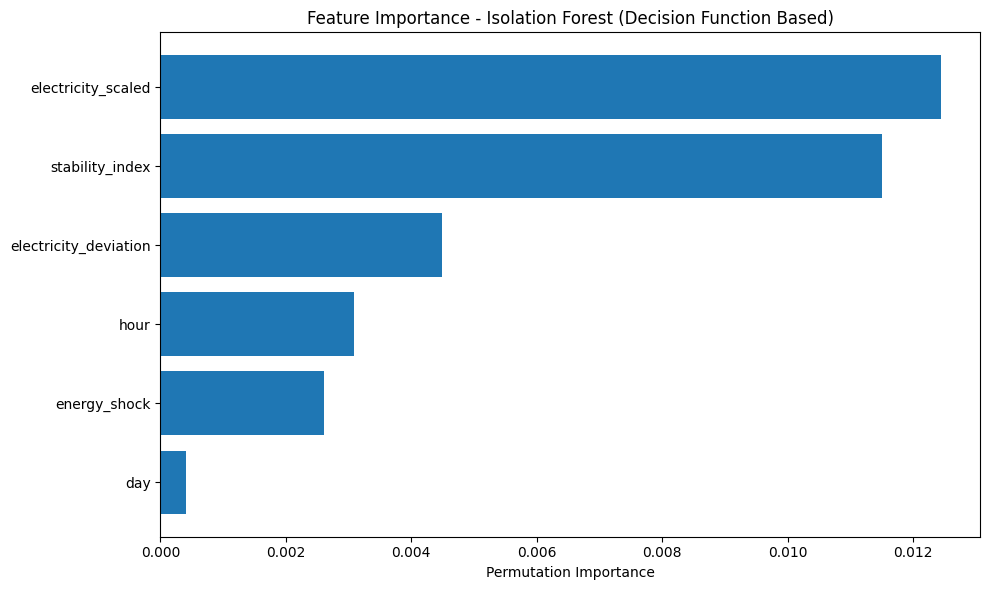

In [62]:
feature_names = ml_features

importances = result.importances_mean
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance - Isolation Forest (Decision Function Based)")
plt.tight_layout()
plt.savefig("feature_importance.png", dpi=300)
plt.show()


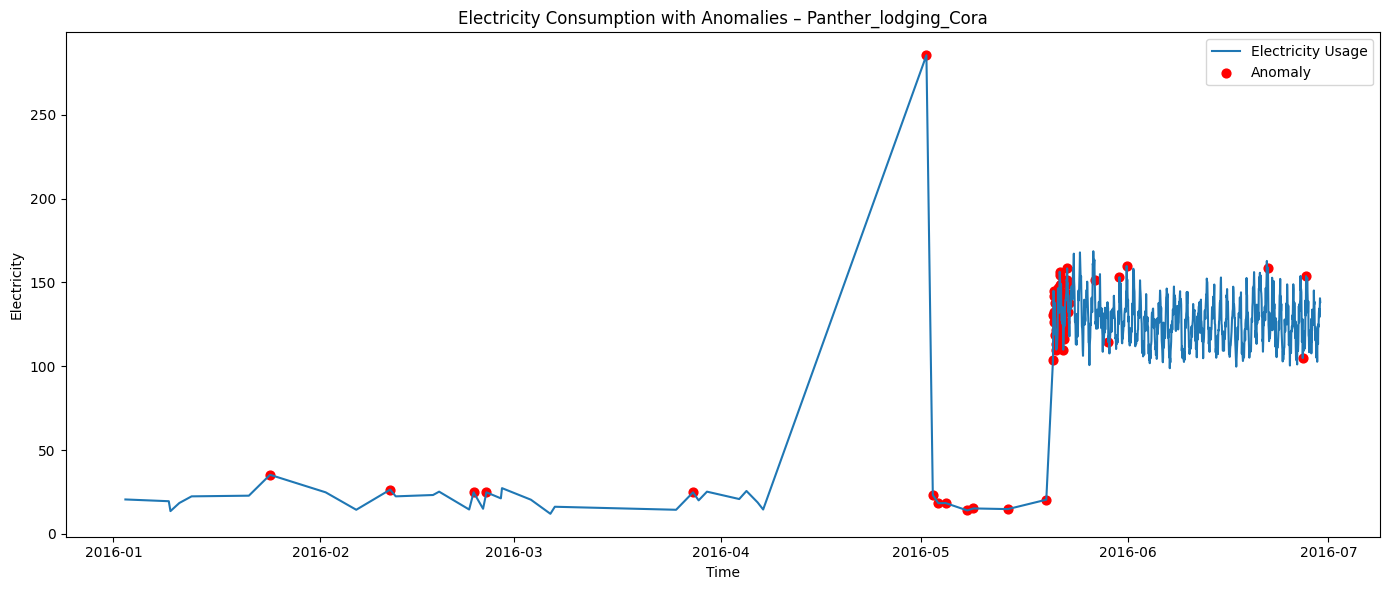

In [ ]:
import matplotlib.pyplot as plt


b = df_long['building'].iloc[0]
sample = df_long[df_long['building'] == b].iloc[:1000]

plt.figure(figsize=(14,6))
plt.plot(sample['timestamp'], sample['electricity'], label="Electricity Usage")

anoms = sample[sample['is_anomaly'] == 1]
plt.scatter(
    anoms['timestamp'],
    anoms['electricity'],
    color='red',
    s=40,
    label="Anomaly"
)

plt.title(f"Electricity Consumption with Anomalies – {b}")
plt.xlabel("Time")
plt.ylabel("Electricity")
plt.legend()
plt.tight_layout()
plt.savefig("anomaly_timeseries.png", dpi=300)
plt.show()


In [65]:
top_anomalies = df_long[df_long['is_anomaly'] == 1].sort_values(
    by='confidence', ascending=False
).head(10)

top_anomalies[['timestamp','building','electricity','confidence']]


,timestamp,building,electricity,confidence
44622,2017-02-01 06:00:00,Panther_office_Hannah,24.1327,1.0
44076,2017-01-09 12:00:00,Panther_office_Hannah,25.1709,1.0
14153,2017-08-12 17:00:00,Panther_parking_Lorriane,17.4033,1.0
9859,2017-02-14 19:00:00,Panther_parking_Lorriane,3.7207,1.0
44073,2017-01-09 09:00:00,Panther_office_Hannah,27.7704,1.0
43114,2016-11-30 10:00:00,Panther_office_Hannah,11.1652,1.0
43914,2017-01-02 18:00:00,Panther_office_Hannah,8.3906,1.0
38629,2016-05-27 13:00:00,Panther_office_Hannah,16.1701,1.0
44077,2017-01-09 13:00:00,Panther_office_Hannah,19.5178,1.0
45012,2017-02-17 12:00:00,Panther_office_Hannah,16.6922,1.0


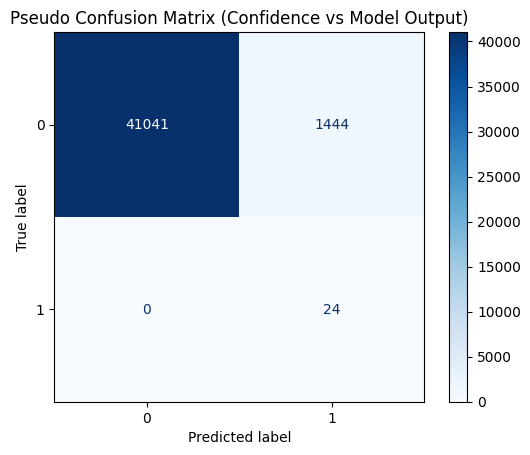

In [66]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# pseudo labels
y_true = (df_long['confidence'] > 0.8).astype(int)
y_pred = df_long['is_anomaly']

cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Pseudo Confusion Matrix (Confidence vs Model Output)")
plt.savefig("confusion_matrix.png", dpi=300)
plt.show()


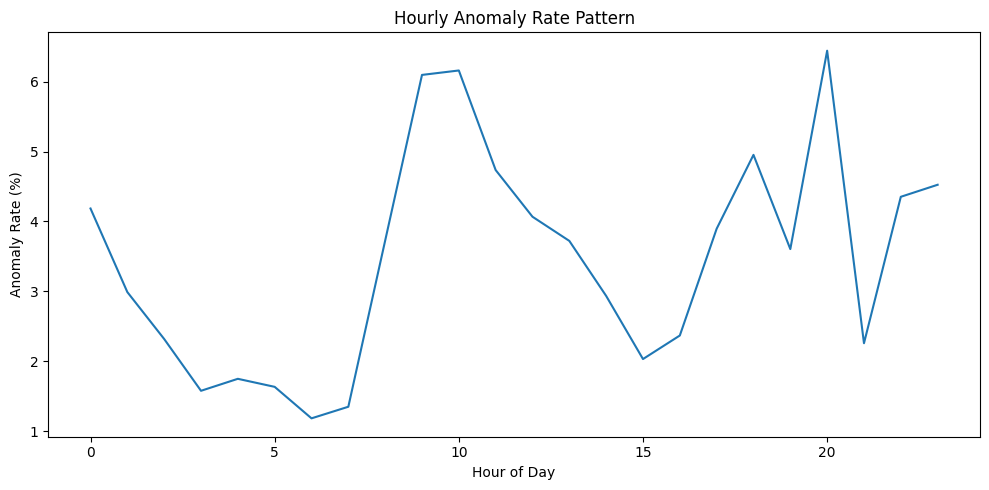

In [67]:
hourly_anomalies = df_long.groupby('hour')['is_anomaly'].mean() * 100

plt.figure(figsize=(10,5))
plt.plot(hourly_anomalies.index, hourly_anomalies.values)
plt.xlabel("Hour of Day")
plt.ylabel("Anomaly Rate (%)")
plt.title("Hourly Anomaly Rate Pattern")
plt.tight_layout()
plt.savefig("hourly_anomaly_rate.png", dpi=300)
plt.show()


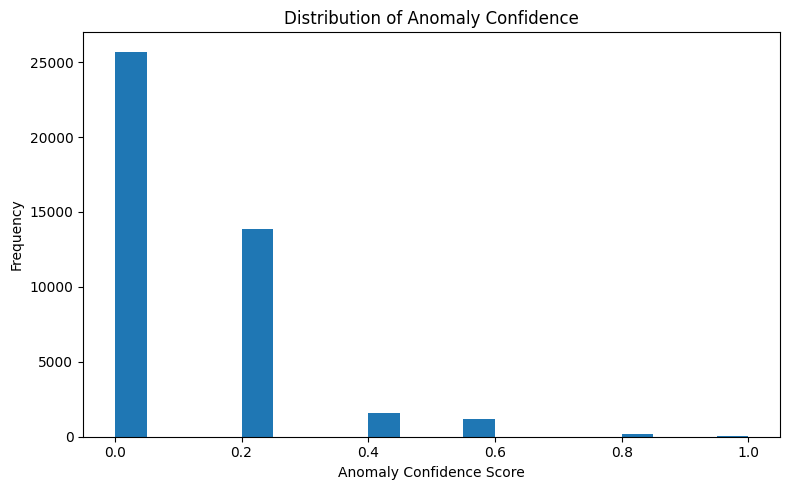

In [69]:
plt.figure(figsize=(8,5))
plt.hist(df_long['confidence'], bins=20)
plt.xlabel("Anomaly Confidence Score")
plt.ylabel("Frequency")
plt.title("Distribution of Anomaly Confidence")
plt.tight_layout()
plt.savefig("confidence_distribution.png", dpi=300)
plt.show()


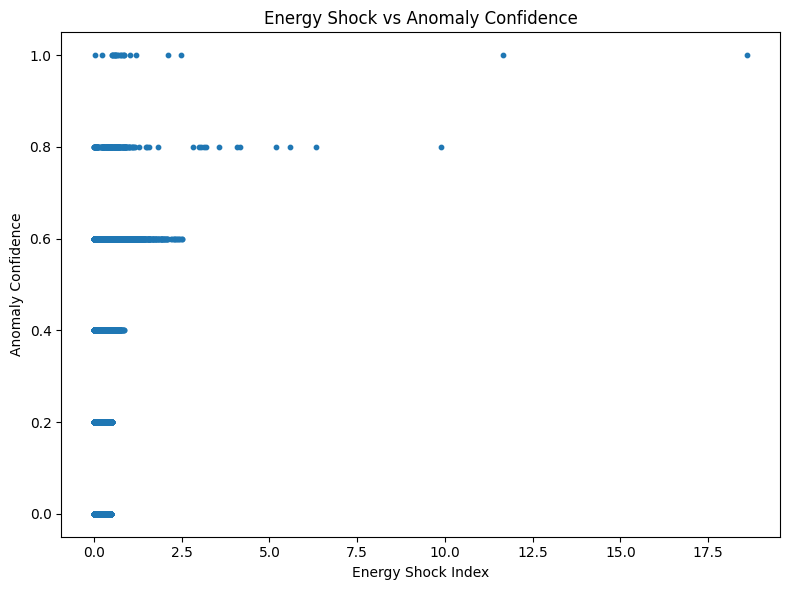

In [70]:
plt.figure(figsize=(8,6))
plt.scatter(df_long['energy_shock'], df_long['confidence'], s=10)
plt.xlabel("Energy Shock Index")
plt.ylabel("Anomaly Confidence")
plt.title("Energy Shock vs Anomaly Confidence")
plt.tight_layout()
plt.savefig("energy_shock_vs_confidence.png", dpi=300)
plt.show()


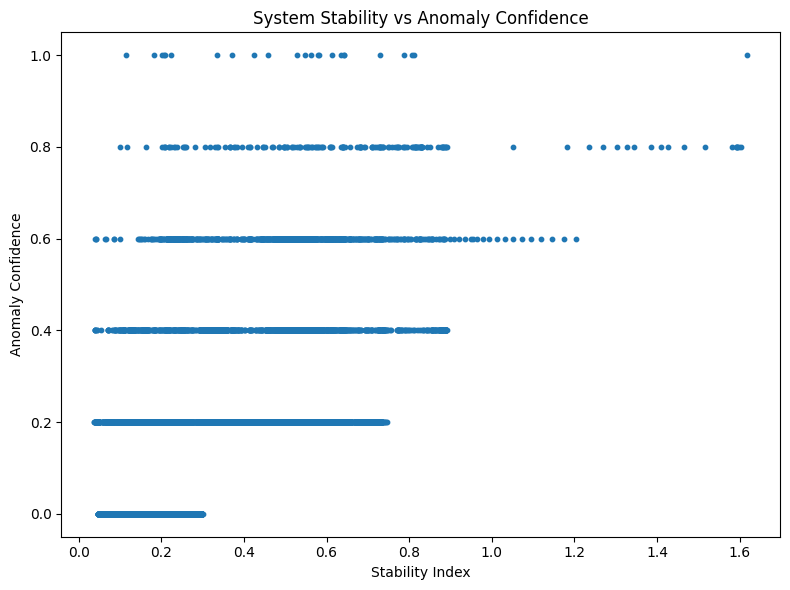

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(df_long['stability_index'], df_long['confidence'], s=10)
plt.xlabel("Stability Index")
plt.ylabel("Anomaly Confidence")
plt.title("System Stability vs Anomaly Confidence")
plt.tight_layout()
plt.savefig("stability_vs_confidence.png", dpi=300)
plt.show()


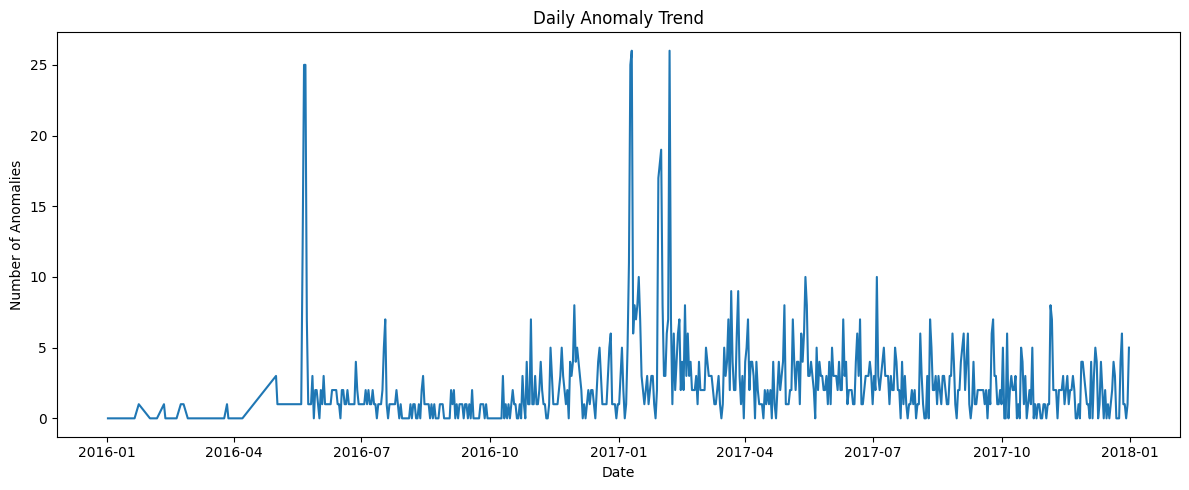

In [72]:
daily_anomalies = df_long.groupby(df_long['timestamp'].dt.date)['is_anomaly'].sum()

plt.figure(figsize=(12,5))
plt.plot(daily_anomalies.index, daily_anomalies.values)
plt.xlabel("Date")
plt.ylabel("Number of Anomalies")
plt.title("Daily Anomaly Trend")
plt.tight_layout()
plt.savefig("daily_anomaly_trend.png", dpi=300)
plt.show()


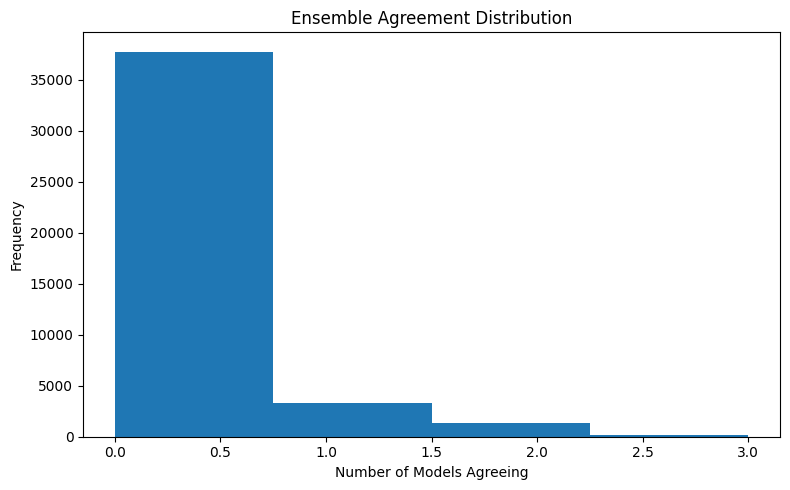

In [73]:
plt.figure(figsize=(8,5))
plt.hist(df_long['anomaly_votes'], bins=4)
plt.xlabel("Number of Models Agreeing")
plt.ylabel("Frequency")
plt.title("Ensemble Agreement Distribution")
plt.tight_layout()
plt.savefig("ensemble_agreement.png", dpi=300)
plt.show()


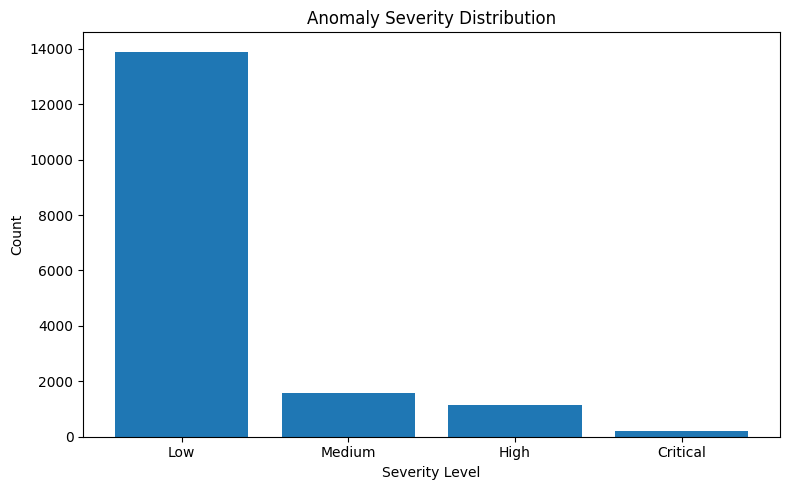

In [74]:
severity_bins = [0, 0.25, 0.5, 0.75, 1.01]
severity_labels = ["Low", "Medium", "High", "Critical"]

df_long['severity'] = pd.cut(df_long['confidence'], bins=severity_bins, labels=severity_labels)

severity_count = df_long['severity'].value_counts().sort_index()

plt.figure(figsize=(8,5))
plt.bar(severity_count.index.astype(str), severity_count.values)
plt.xlabel("Severity Level")
plt.ylabel("Count")
plt.title("Anomaly Severity Distribution")
plt.tight_layout()
plt.savefig("severity_distribution.png", dpi=300)
plt.show()


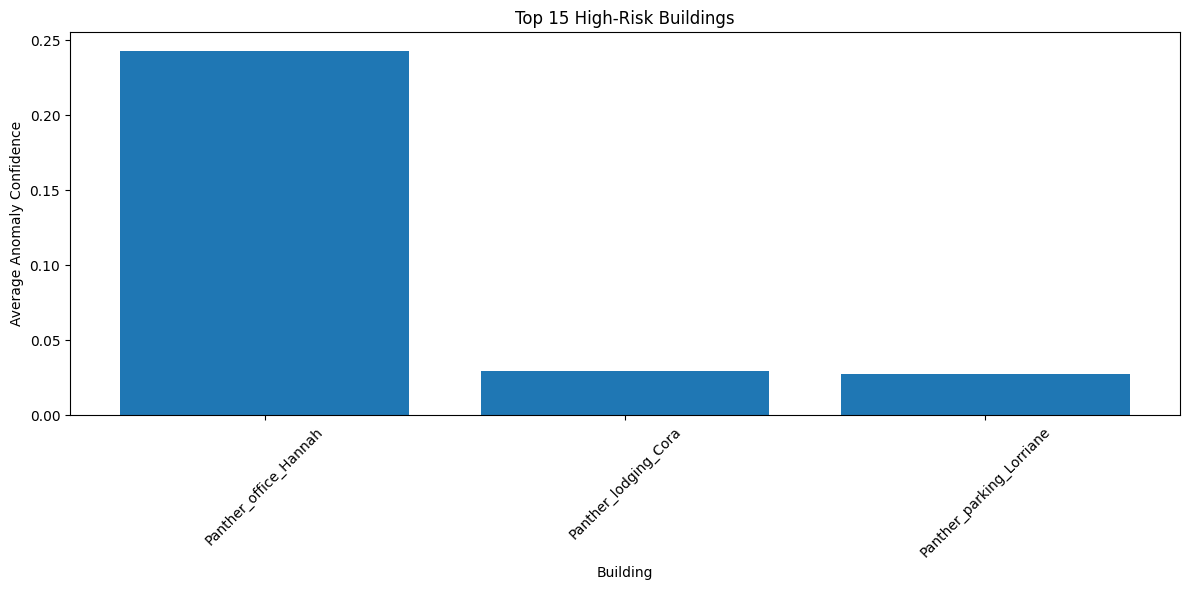

In [75]:
building_risk = df_long.groupby('building')['confidence'].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12,6))
plt.bar(building_risk.index, building_risk.values)
plt.xticks(rotation=45)
plt.xlabel("Building")
plt.ylabel("Average Anomaly Confidence")
plt.title("Top 15 High-Risk Buildings")
plt.tight_layout()
plt.savefig("building_risk.png", dpi=300)
plt.show()


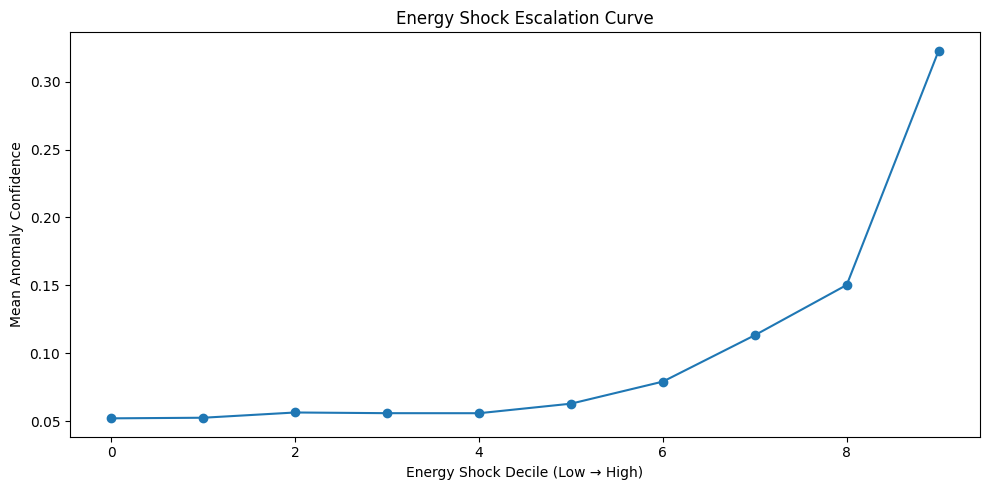

In [76]:
shock_bins = pd.qcut(df_long['energy_shock'], 10)

shock_vs_conf = df_long.groupby(shock_bins)['confidence'].mean()

plt.figure(figsize=(10,5))
plt.plot(range(len(shock_vs_conf)), shock_vs_conf.values, marker='o')
plt.xlabel("Energy Shock Decile (Low → High)")
plt.ylabel("Mean Anomaly Confidence")
plt.title("Energy Shock Escalation Curve")
plt.tight_layout()
plt.savefig("energy_shock_curve.png", dpi=300)
plt.show()


In [ ]:

df_long['anomaly_flag'] = df_long['is_anomaly'].astype(int)

# Create anomaly persistence per building
df_long['anomaly_persistence'] = (
    df_long
    .groupby('building')['anomaly_flag']
    .transform(lambda x: x * (x.groupby((x != x.shift()).cumsum()).cumcount() + 1))
)

print("anomaly_persistence created")
print(df_long[['anomaly_flag','anomaly_persistence']].head(20))


anomaly_persistence created
       anomaly_flag  anomaly_persistence
17587             0                    0
17743             0                    0
17749             0                    0
17781             0                    0
17825             0                    0
18031             0                    0
18107             1                    1
18307             0                    0
18417             0                    0
18539             1                    1
18559             0                    0
18693             0                    0
18715             0                    0
18823             0                    0
18839             1                    1
18873             0                    0
18885             1                    1
18937             0                    0
18941             0                    0
19045             0                    0


In [ ]:

df_long['expected_energy'] = df_long['electricity_rolling_mean']

df_long['loss'] = (df_long['electricity'] - df_long['expected_energy']).clip(lower=0)


In [82]:
print(df_long[['electricity', 'expected_energy', 'loss']].head(10))


       electricity  expected_energy       loss
17587      20.5540        20.554000   0.000000
17743      19.5038        20.028900   0.000000
17749      13.6026        17.886800   0.000000
17781      18.4536        18.028500   0.425100
17825      22.4043        18.903660   3.500640
18031      22.8044        19.553783   3.250617
18107      35.2568        21.797071  13.459729
18307      24.8048        22.173037   2.631763
18417      14.4028        21.309678   0.000000
18539      26.4051        21.819220   4.585880


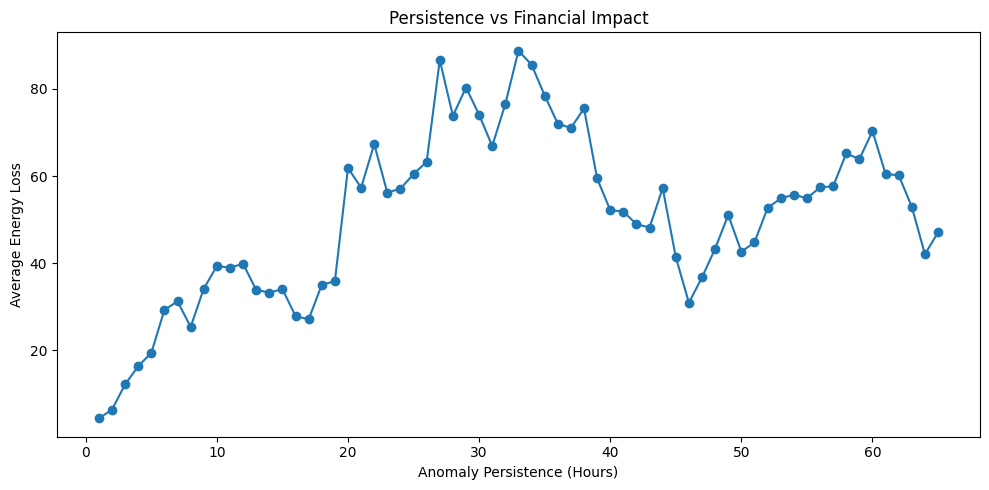

In [83]:
persist_vs_loss = (
    df_long[df_long['is_anomaly'] == 1]
    .groupby('anomaly_persistence')['loss']
    .mean()
)

plt.figure(figsize=(10,5))
plt.plot(persist_vs_loss.index, persist_vs_loss.values, marker='o')
plt.xlabel("Anomaly Persistence (Hours)")
plt.ylabel("Average Energy Loss")
plt.title("Persistence vs Financial Impact")
plt.tight_layout()
plt.savefig("persistence_vs_loss.png", dpi=300)
plt.show()


In [85]:
# Normalization helper
df_long['norm_persistence'] = df_long['anomaly_persistence'] / (df_long['anomaly_persistence'].max() + 1)

df_long['ai_priority_score'] = (
    0.4 * df_long['confidence'] +
    0.2 * df_long['energy_shock'] +
    0.2 * df_long['stability_index'] +
    0.2 * df_long['norm_persistence']
)


In [86]:
print("ai_priority_score created:", 'ai_priority_score' in df_long.columns)
print(df_long[['confidence','energy_shock','stability_index','anomaly_persistence','ai_priority_score']].head())


ai_priority_score created: True
       confidence  energy_shock  stability_index  anomaly_persistence  \
17587         0.2      0.051095         0.037077                    0   
17743         0.2      0.051095         0.037077                    0   
17749         0.0      0.302567         0.209495                    0   
17781         0.0      0.356623         0.170434                    0   
17825         0.0      0.214088         0.174734                    0   

       ai_priority_score  
17587           0.097634  
17743           0.097634  
17749           0.102412  
17781           0.105411  
17825           0.077764  


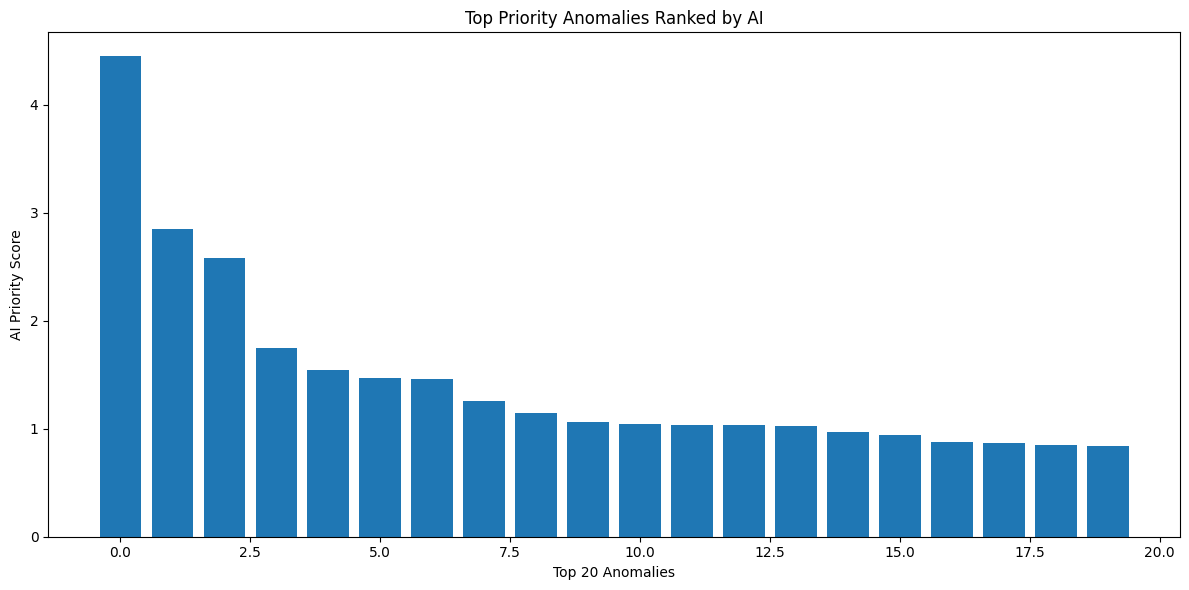

In [87]:
top_priority = df_long.sort_values('ai_priority_score', ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.bar(range(len(top_priority)), top_priority['ai_priority_score'])
plt.xlabel("Top 20 Anomalies")
plt.ylabel("AI Priority Score")
plt.title("Top Priority Anomalies Ranked by AI")
plt.tight_layout()
plt.savefig("ai_priority_ranking.png", dpi=300)
plt.show()


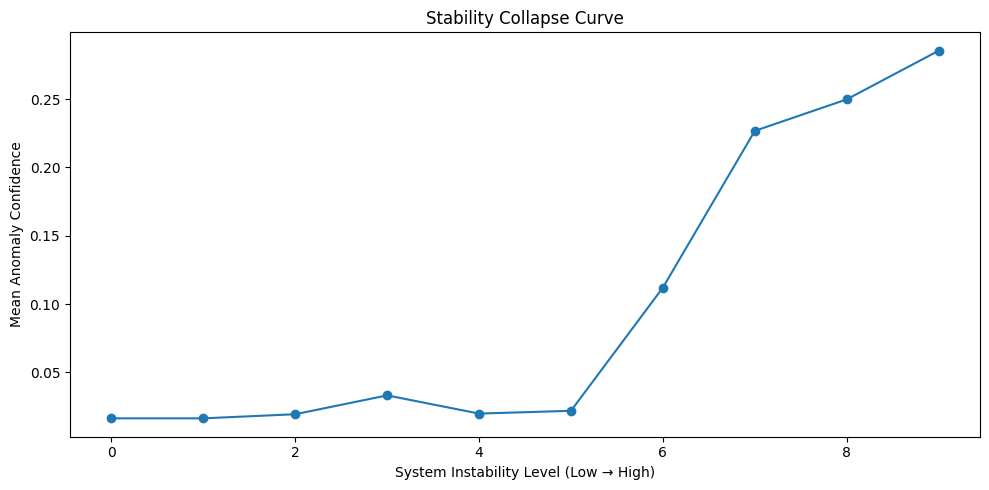

In [88]:
stability_bins = pd.qcut(df_long['stability_index'], 10)
stab_vs_conf = df_long.groupby(stability_bins)['confidence'].mean()

plt.figure(figsize=(10,5))
plt.plot(range(len(stab_vs_conf)), stab_vs_conf.values, marker='o')
plt.xlabel("System Instability Level (Low → High)")
plt.ylabel("Mean Anomaly Confidence")
plt.title("Stability Collapse Curve")
plt.tight_layout()
plt.savefig("stability_collapse.png", dpi=300)
plt.show()


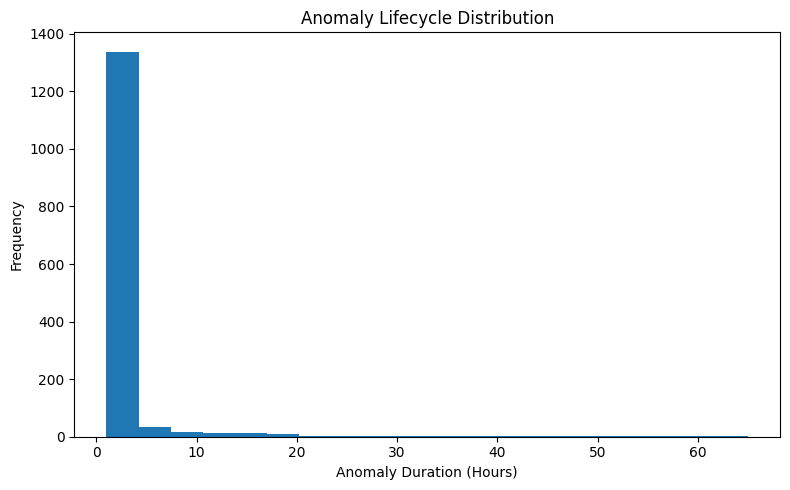

In [89]:
life = df_long[df_long['is_anomaly']==1]['anomaly_persistence']

plt.figure(figsize=(8,5))
plt.hist(life, bins=20)
plt.xlabel("Anomaly Duration (Hours)")
plt.ylabel("Frequency")
plt.title("Anomaly Lifecycle Distribution")
plt.tight_layout()
plt.savefig("anomaly_lifecycle.png", dpi=300)
plt.show()


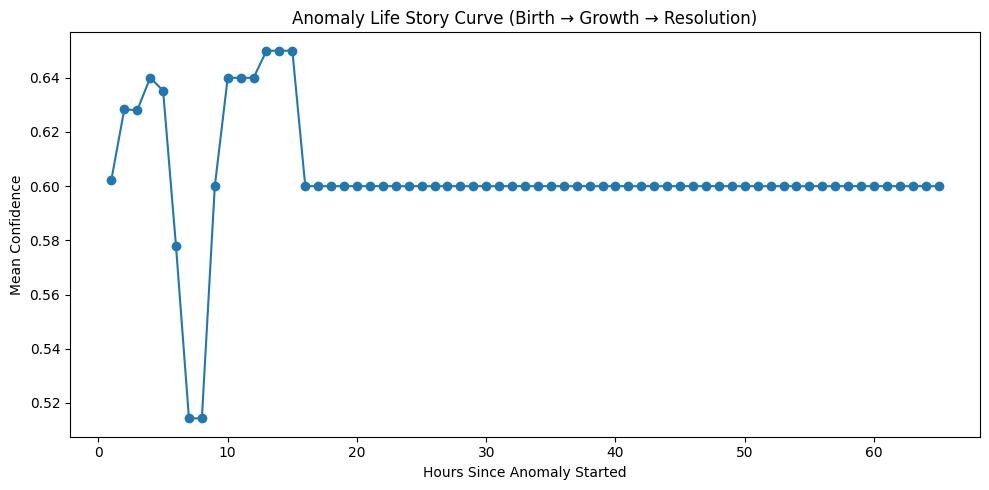

In [91]:
life_story = (
    df_long[df_long['is_anomaly']==1]
    .groupby('anomaly_persistence')['confidence']
    .mean()
)

plt.figure(figsize=(10,5))
plt.plot(life_story.index, life_story.values, marker='o')
plt.xlabel("Hours Since Anomaly Started")
plt.ylabel("Mean Confidence")
plt.title("Anomaly Life Story Curve (Birth → Growth → Resolution)")
plt.tight_layout()
plt.savefig("anomaly_life_story.png", dpi=300)
plt.show()


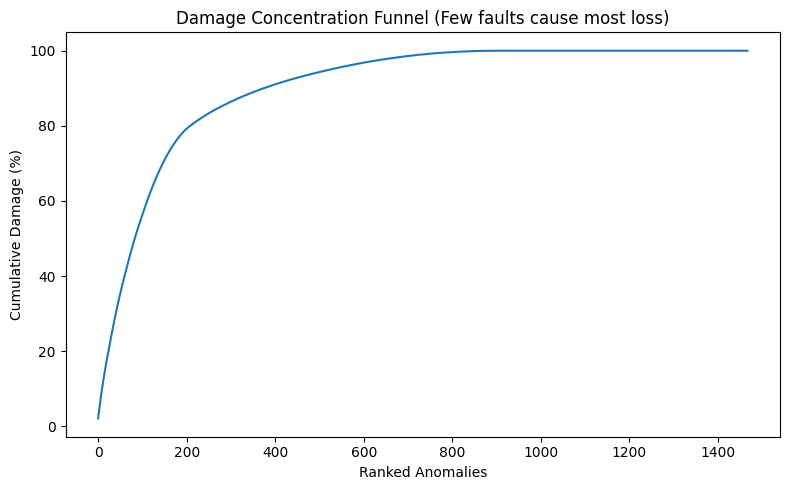

In [92]:
damage = (
    df_long[df_long['is_anomaly']==1]
    .sort_values('loss', ascending=False)['loss']
)

cumulative = damage.cumsum() / damage.sum() * 100

plt.figure(figsize=(8,5))
plt.plot(range(len(cumulative)), cumulative.values)
plt.xlabel("Ranked Anomalies")
plt.ylabel("Cumulative Damage (%)")
plt.title("Damage Concentration Funnel (Few faults cause most loss)")
plt.tight_layout()
plt.savefig("damage_funnel.png", dpi=300)
plt.show()


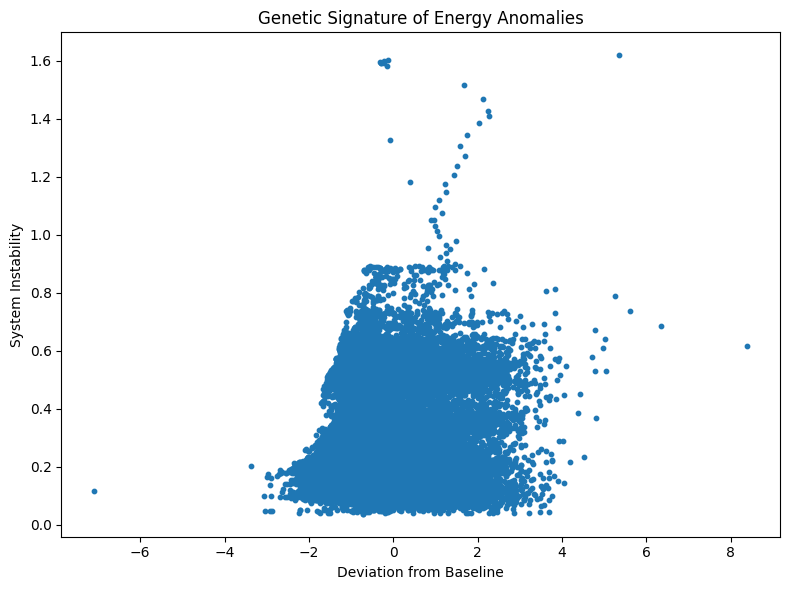

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(df_long['electricity_deviation'], df_long['stability_index'], s=10)
plt.xlabel("Deviation from Baseline")
plt.ylabel("System Instability")
plt.title("Genetic Signature of Energy Anomalies")
plt.tight_layout()
plt.savefig("anomaly_genetic_signature.png", dpi=300)
plt.show()


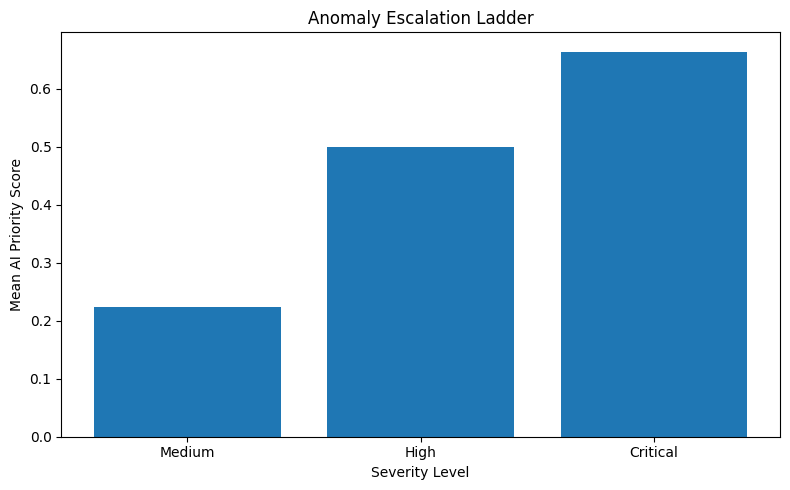

In [95]:
ladder = df_long[df_long['is_anomaly']==1].groupby('severity')['ai_priority_score'].mean()

plt.figure(figsize=(8,5))
plt.bar(ladder.index.astype(str), ladder.values)
plt.xlabel("Severity Level")
plt.ylabel("Mean AI Priority Score")
plt.title("Anomaly Escalation Ladder")
plt.tight_layout()
plt.savefig("anomaly_escalation_ladder.png", dpi=300)
plt.show()


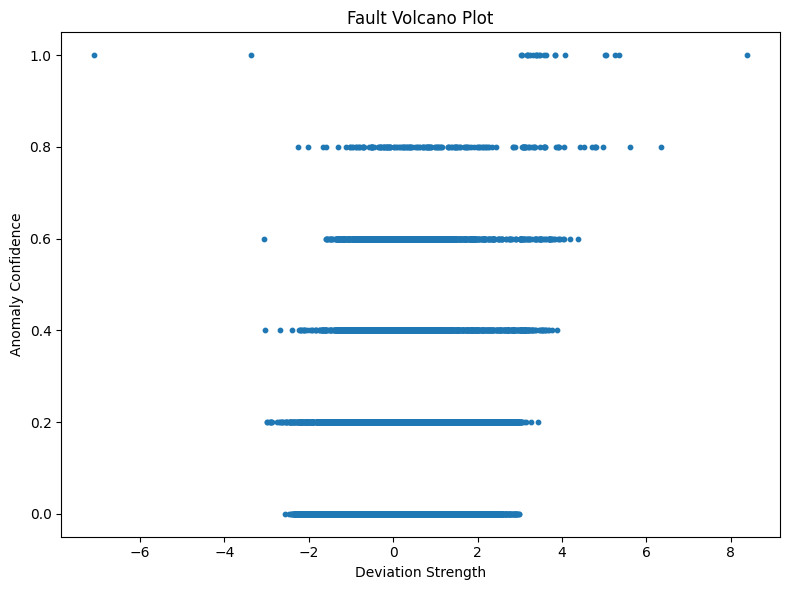

In [96]:
plt.figure(figsize=(8,6))
plt.scatter(df_long['electricity_deviation'], df_long['confidence'], s=10)
plt.xlabel("Deviation Strength")
plt.ylabel("Anomaly Confidence")
plt.title("Fault Volcano Plot")
plt.tight_layout()
plt.savefig("fault_volcano.png", dpi=300)
plt.show()


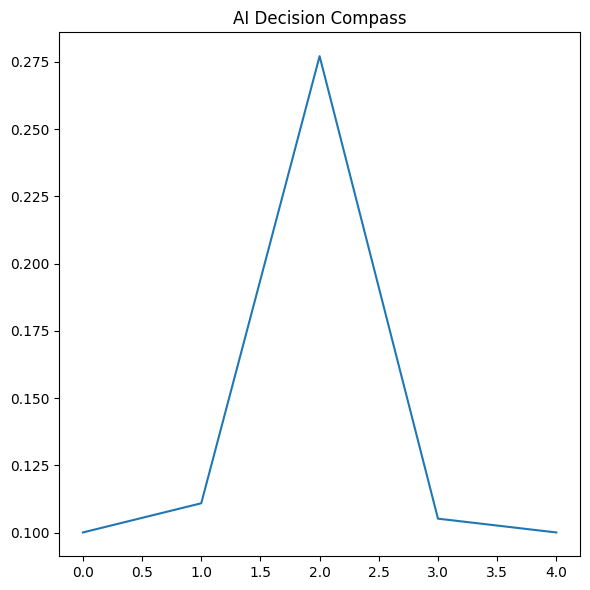

In [97]:
compass = df_long[['confidence','energy_shock','stability_index','anomaly_persistence']].mean()

plt.figure(figsize=(6,6))
plt.plot(compass.values.tolist() + [compass.values[0]])
plt.title("AI Decision Compass")
plt.tight_layout()
plt.savefig("ai_decision_compass.png", dpi=300)
plt.show()


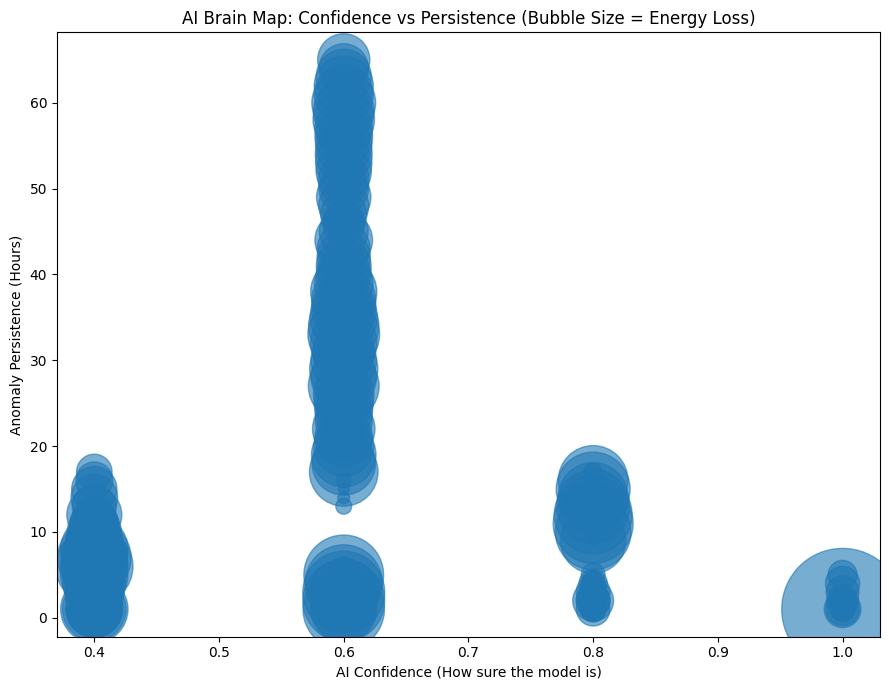

In [ ]:

brain = df_long[df_long['is_anomaly'] == 1]

plt.figure(figsize=(9,7))
plt.scatter(
    brain['confidence'],
    brain['anomaly_persistence'],
    s = brain['loss'] * 30,   # bubble size = financial/energy loss
    alpha=0.6
)

plt.xlabel("AI Confidence (How sure the model is)")
plt.ylabel("Anomaly Persistence (Hours)")
plt.title("AI Brain Map: Confidence vs Persistence (Bubble Size = Energy Loss)")
plt.tight_layout()
plt.savefig("ai_brain_map.png", dpi=300)
plt.show()


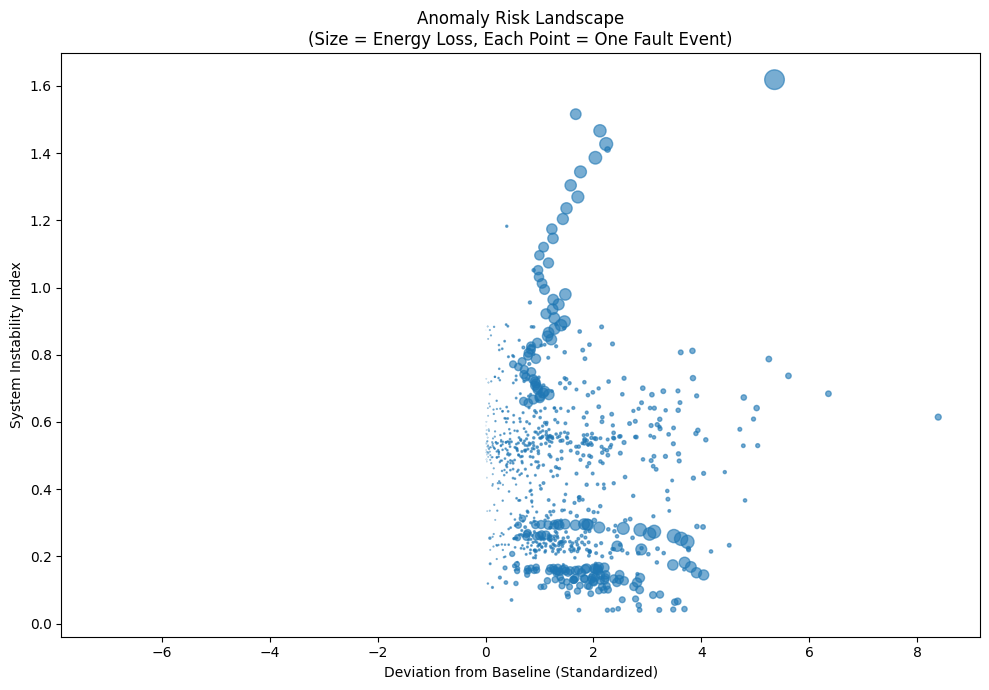

In [99]:
# Work only on anomaly points
risk = df_long[df_long['is_anomaly'] == 1].copy()

# Normalize loss for stable bubble sizing
risk['loss_norm'] = risk['loss'] / (risk['loss'].max() + 1e-6)

plt.figure(figsize=(10,7))

plt.scatter(
    risk['electricity_deviation'],
    risk['stability_index'],
    s = 200 * risk['loss_norm'],   # bubble size = normalized loss
    alpha = 0.6
)

plt.xlabel("Deviation from Baseline (Standardized)")
plt.ylabel("System Instability Index")
plt.title("Anomaly Risk Landscape\n(Size = Energy Loss, Each Point = One Fault Event)")

plt.tight_layout()
plt.savefig("anomaly_risk_landscape.png", dpi=300)
plt.show()


Business Insights & Impact 

Cost Impact

In [ ]:
# Cost per kWh 
avg_kwh_cost = 0.12  

anomaly_df = df_long[df_long['is_anomaly'] == 1].copy()

total_energy_loss = anomaly_df['loss'].sum()
anomaly_cost = total_energy_loss * avg_kwh_cost

print(f"Total wasted energy (kWh): {total_energy_loss:,.2f}")
print(f"Estimated financial loss from anomalies: ${anomaly_cost:,.2f}")


Total wasted energy (kWh): 12,197.73
Estimated financial loss from anomalies: $1,463.73


Seasonal Pattern

In [101]:
anomaly_df['month'] = anomaly_df['timestamp'].dt.month

seasonal_pattern = anomaly_df.groupby('month').size()

print("\nAnomalies by Month:")
print(seasonal_pattern)



Anomalies by Month:
month
1     203
2     137
3      96
4      75
5     196
6     130
7     120
8      88
9      94
10     80
11    129
12    120
dtype: int64


Peak Anomaly Hours

In [102]:
anomaly_df['hour'] = anomaly_df['timestamp'].dt.hour

peak_hours = anomaly_df.groupby('hour').size().sort_values(ascending=False)

print("\nTop 10 Peak Anomaly Hours:")
print(peak_hours.head(10))



Top 10 Peak Anomaly Hours:
hour
20    114
10    109
9     108
18     88
11     84
23     80
22     77
0      74
12     72
17     69
dtype: int64


Anomaly Type Classification

In [103]:
anomaly_df['type'] = pd.cut(
    anomaly_df['electricity_deviation'],
    bins=[-np.inf, -2, 2, np.inf],
    labels=['Sudden Drop', 'Normal Fluctuation', 'Energy Spike']
)

print("\nAnomaly Types Distribution:")
print(anomaly_df['type'].value_counts())



Anomaly Types Distribution:
type
Normal Fluctuation    1255
Energy Spike           197
Sudden Drop             16
Name: count, dtype: int64


High-Risk Buildings Identification

In [104]:
high_risk_buildings = (
    anomaly_df.groupby('building')['ai_priority_score']
    .mean()
    .sort_values(ascending=False)
    .head(10)
)

print("\nTop 10 High-Risk Buildings:")
print(high_risk_buildings)



Top 10 High-Risk Buildings:
building
Panther_office_Hannah       0.534904
Panther_parking_Lorriane    0.446696
Panther_lodging_Cora        0.348285
Name: ai_priority_score, dtype: float64


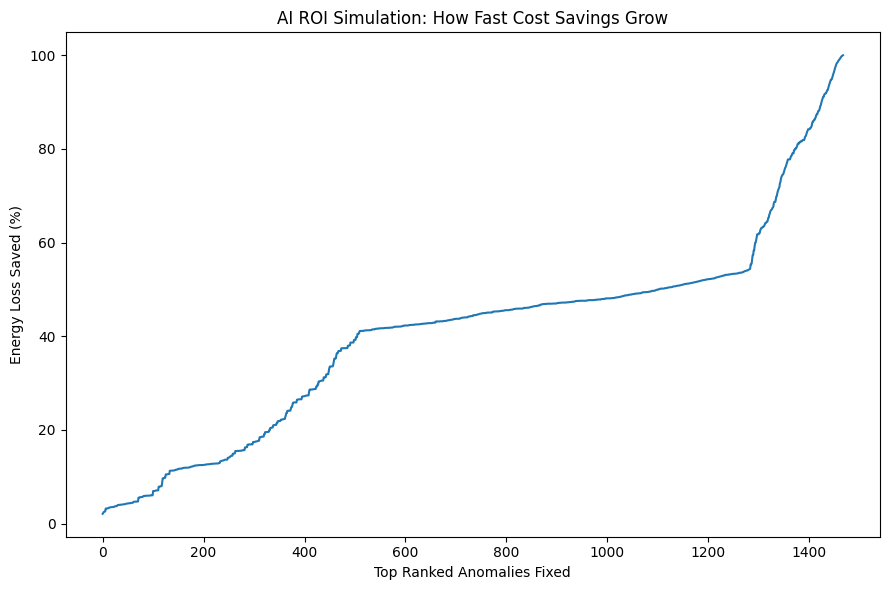

In [ ]:
# Only anomaly rows
risk_df = df_long[df_long['is_anomaly'] == 1].copy()

# Sort anomalies by priority 
risk_df = risk_df.sort_values('ai_priority_score', ascending=False)

# Cumulative loss saving curve
risk_df['cumulative_saving'] = risk_df['loss'].cumsum()

total_loss = risk_df['loss'].sum()

# % saving if we fix top X anomalies
risk_df['saving_percentage'] = (risk_df['cumulative_saving'] / total_loss) * 100

plt.figure(figsize=(9,6))
plt.plot(risk_df['saving_percentage'].values)
plt.xlabel("Top Ranked Anomalies Fixed")
plt.ylabel("Energy Loss Saved (%)")
plt.title("AI ROI Simulation: How Fast Cost Savings Grow")
plt.tight_layout()
plt.savefig("ai_roi_simulation.png", dpi=300)
plt.show()


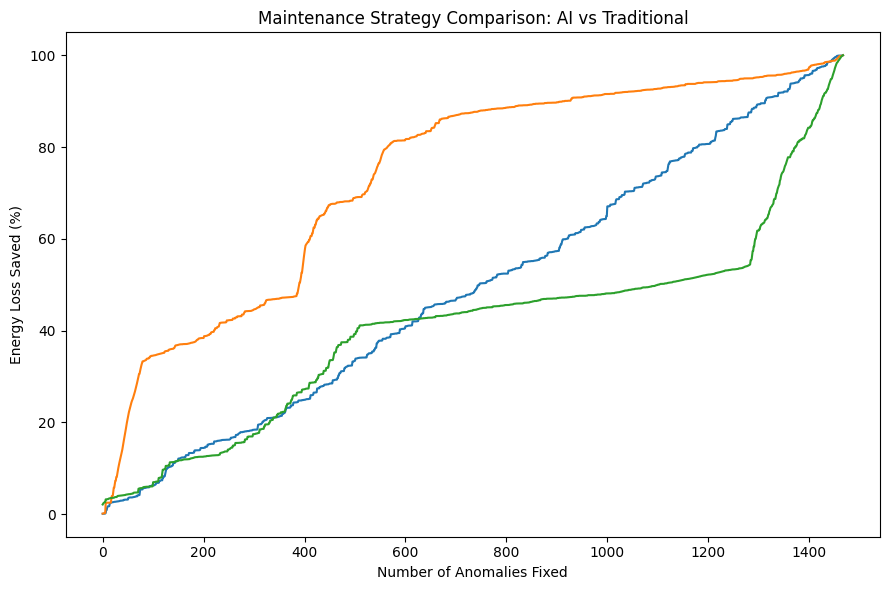

In [ ]:
import numpy as np

# Random strategy
random_fix = risk_df.sample(frac=1)
random_saving = random_fix['loss'].cumsum() / total_loss * 100

# Time-based strategy
time_fix = risk_df.sort_values('timestamp')
time_saving = time_fix['loss'].cumsum() / total_loss * 100

# AI strategy
ai_fix = risk_df.sort_values('ai_priority_score', ascending=False)
ai_saving = ai_fix['loss'].cumsum() / total_loss * 100


plt.figure(figsize=(9,6))
plt.plot(random_saving.values)
plt.plot(time_saving.values)
plt.plot(ai_saving.values)
plt.xlabel("Number of Anomalies Fixed")
plt.ylabel("Energy Loss Saved (%)")
plt.title("Maintenance Strategy Comparison: AI vs Traditional")
plt.tight_layout()
plt.savefig("maintenance_strategy_comparison.png", dpi=300)
plt.show()


In [107]:
df_long.to_pickle("df_long.pkl")


In [109]:
# Force all object/string columns to normal Python strings
for col in df_long.select_dtypes(include=['string']).columns:
    df_long[col] = df_long[col].astype(str)

# Save again with safe pickle protocol
df_long.to_pickle("df_long.pkl", protocol=4)


In [110]:
df_long.to_csv("df_long.csv", index=False)


In [2]:
import pandas as pd

df_long = pd.read_csv("df_long.csv")
print(df_long.columns.tolist())


['timestamp', 'building', 'electricity', 'hour', 'day', 'electricity_scaled', 'electricity_rolling_mean', 'electricity_rolling_std', 'electricity_deviation', 'electricity_lag1', 'energy_shock', 'stability_index', 'anomaly_lof', 'anomaly_maha', 'anomaly_iso', 'anomaly_votes', 'is_anomaly', 'zscore', 'anomaly_z', 'anomaly_rule', 'confidence', 'severity', 'anomaly_flag', 'anomaly_persistence', 'expected_energy', 'loss', 'norm_persistence', 'ai_priority_score']
